In [1]:
import numpy as np
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
n_inputs = 4
n_neurons = 6
n_timesteps = 2



/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:
#The data is a sequence of a number from 0 to 9 and divided into three batches of data.
## Data 
X_batch = np.array([
        [[0, 1, 2, 5], [9, 8, 7, 4]], # Batch 1
        [[3, 4, 5, 2], [0, 0, 0, 0]], # Batch 2
        [[6, 7, 8, 5], [6, 5, 4, 2]], # Batch 3
    ])

In [3]:
X = tf.placeholder(tf.float32, [None, n_timesteps, n_inputs])

In [4]:
conda remove tensorflow-gpu tensorflow tensorflow-base

Solving environment: failed

PackagesNotFoundError: The following packages are missing from the target environment:
  - tensorflow
  - tensorflow-base
  - tensorflow-gpu



Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda install tensorflow

In [4]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [5]:
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
## Define the shape of the tensor
X = tf.placeholder(tf.float32, [None, n_timesteps, n_inputs])
## Define the network
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,reuse=True)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)
init = tf.global_variables_initializer()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})

In [7]:
print(outputs_val)   

[[[ 0.8634097  -0.7442044  -0.9365817  -0.8596248  -0.9874564
   -0.88407004]
  [ 0.95546013  0.89061    -0.99999976 -0.72299385  0.21398525
   -0.71158266]]

 [[ 0.0188475  -0.42942336 -0.9907438  -0.8940865  -0.2178452
   -0.15210964]
  [ 0.2298994   0.26016     0.09222168  0.2643406  -0.4619128
    0.03438724]]

 [[ 0.68307817 -0.34079832 -0.9999828  -0.97995174 -0.7569505
   -0.7737912 ]
  [ 0.8226837   0.77925307 -0.9999191  -0.16902162  0.32120833
   -0.5652817 ]]]


In [8]:
print(outputs_val.shape) 

(3, 2, 6)


In [9]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
def create_ts(start = '2001', n = 201, freq = 'M'):
    rng = pd.date_range(start=start, periods=n, freq=freq)
    ts = pd.Series(np.random.uniform(-18, 18, size=len(rng)), rng).cumsum()
    return ts
ts= create_ts(start = '2001', n = 192, freq = 'M')
ts.tail(5)

2016-08-31    72.403260
2016-09-30    64.143251
2016-10-31    46.619254
2016-11-30    53.558140
2016-12-31    69.509986
Freq: M, dtype: float64

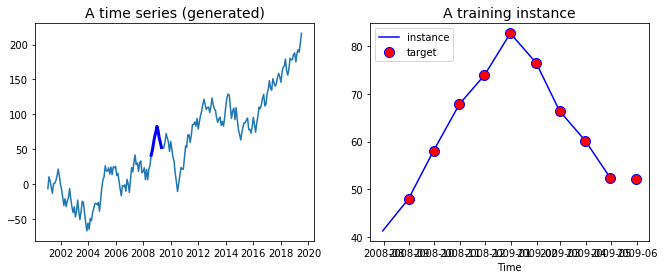

In [10]:
ts = create_ts(start = '2001', n = 222)

# Left
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(ts.index, ts)
plt.plot(ts.index[90:100], ts[90:100], "b-", linewidth=3, label="A training instance")
plt.title("A time series (generated)", fontsize=14)

# Right
plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(ts.index[90:100], ts[90:100], "b-", markersize=8, label="instance")
plt.plot(ts.index[91:101], ts[91:101], "bo", markersize=10, label="target", markerfacecolor='red')
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [11]:
series = np.array(ts)
n_windows = 20   
n_input =  1
n_output = 1
size_train = 201

In [12]:
## Split data
train = series[:size_train]
test = series[size_train:]
print(train.shape, test.shape)

(201,) (21,)


In [13]:
x_data = train[:size_train-1]#: Select all the training instance minus one day
X_batches = x_data.reshape(10, 20, 1)#: create the right shape for the batch e.g (10, 20, 1)
def create_batches(df, windows, input, output):
    ## Create X         
        x_data = train[:size_train-1] # Select the data
        X_batches = x_data.reshape(-1, windows, input)  # Reshape the data 
    ## Create y
        y_data = train[n_output:size_train]
        y_batches = y_data.reshape(-1, windows, output)
        return X_batches, y_batches

In [14]:
X_batches, y_batches = create_batches(df = train,
                                      windows = n_windows,
                                      input = n_input,
                                      output = n_output)

In [15]:
print(X_batches.shape, y_batches.shape)

(10, 20, 1) (10, 20, 1)


In [16]:
X_test, y_test = create_batches(df = test, windows = 20,input = 1, output = 1)
print(X_test.shape, y_test.shape)

(10, 20, 1) (10, 20, 1)


In [17]:
tf.placeholder(tf.float32, [None, n_windows, n_input]) 	

<tf.Tensor 'Placeholder_2:0' shape=(?, 20, 1) dtype=float32>

In [18]:
tf.reset_default_graph()
r_neuron = 120    

## 1. Construct the tensors
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

## 2. create the model
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)              

stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output])   

## 3. Loss + optimization
learning_rate = 0.001  
 
loss = tf.reduce_sum(tf.square(outputs - y))    
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)         
training_op = optimizer.minimize(loss)                                          

init = tf.global_variables_initializer() 

Instructions for updating:
Use keras.layers.dense instead.


In [19]:
iteration = 1500 

with tf.Session() as sess:
    init.run()
    for iters in range(iteration):
        sess.run(training_op, feed_dict={X: X_batches, y: y_batches})
        if iters % 150 == 0:
            mse = loss.eval(feed_dict={X: X_batches, y: y_batches})
            print(iters, "\tMSE:", mse)
    
    y_pred = sess.run(outputs, feed_dict={X: X_test})

0 	MSE: 853259.5
150 	MSE: 20389.127
300 	MSE: 5436.2417
450 	MSE: 3664.1958
600 	MSE: 3132.5093
750 	MSE: 3018.6968
900 	MSE: 2552.3833
1050 	MSE: 2478.3965
1200 	MSE: 2244.8413
1350 	MSE: 2081.691


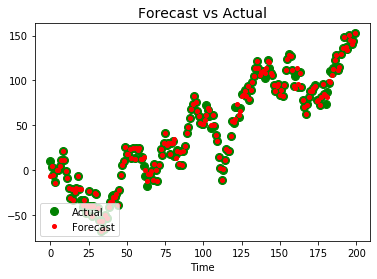

In [20]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=8, label="Forecast", color='red')
plt.legend(loc="lower left")
plt.xlabel("Time")

plt.show()